# Sentiment prediction of IMDB Movie Reviews

In this exercise, several classifier models, such as SVM, decision tree, and logistic regression, are applied to predict sentiment of reviews.IMDB dataset having 50K movie reviews for natural language processing or Text analytics. We use a set of 25,000 highly polar movie reviews for training and 25,000 for testing. 
Click [here](https://ai.stanford.edu/~amaas/data/sentiment/) for more dataset information.

## Table of Contents
#### [Part 1: Data preparation](#Part-1:-Data-preparation)
#### [Part 2: Building models](#Part-2:-Building-models)
#### [Part 3: Evaluation - F1 score](#Part-3:-Evaluation)
#### [Part 4: Optimization](#Part-4:-Optimization)
	    - GridSearchCV
    	- Stop word
        - F1 score
#### [Part 5: Conclusion](#Part-5:-Conclusion)
---

<h1>Part 1: Data preparation

### Define class
First, we create a class applied to every reviews.

In [2]:
class Review:
    def __init__(self, index, text, score, sentiment):
        self.index = index
        self.text = text
        self.score = score
        self.sentiment = sentiment
    def showText(self):
        return self.text
    def showScore(self):
        return self.score
    def showSentiment(self):
        return self.sentiment

<h3> Building up useful functions</h3>

In [3]:
import os
import glob
import random
    
def mySort(n):
    return int(n.split('_')[0])

def load_review(path, start, end, sentiment):
    reviews = []
    filelist = []
    os.chdir(path)
    for files in glob.glob('*.txt'):
        fileName, fileExtension = os.path.splitext(files)
        filelist.append(fileName) #filename without extension

    filelist.sort(key=mySort)
    shrunk_filesList = filelist[start:start+end]

    for file in shrunk_filesList:
        f = open(path + "/" + file + '.txt', 'r')
        index = int(file.split('_')[0])
        score = int(file.split('_')[1])
        text = f.read()
        reviews.append(Review(index, text, score, sentiment))
        f.close()
    return reviews

def gen_train_test(dataNum):
    train_pos_reviews = load_review(train_pos, 0, dataNum, 'Positive')
    train_neg_reviews = load_review(train_neg, 0, dataNum, 'Negative')
    test_pos_reviews = load_review(test_pos, 0, dataNum, 'Positive')
    test_neg_reviews = load_review(test_neg, 0, dataNum, 'Negative')

    train_reviews = train_pos_reviews + train_neg_reviews
    test_reviews = test_pos_reviews + test_neg_reviews
    
    # Shuffle data set
    random.shuffle(train_reviews)
    random.shuffle(test_reviews)
    
    return train_reviews, test_reviews

<h3> Loading training and testing data set and split</h3>

In [33]:
# training and test dataset file path
train_pos = '/Users/huanghui/Documents/NTUT/110-1/Big Data Analysis/Homework/Homework/Final project/Code/train/pos'
train_neg = '/Users/huanghui/Documents/NTUT/110-1/Big Data Analysis/Homework/Homework/Final project/Code/train/neg'
test_pos = '/Users/huanghui/Documents/NTUT/110-1/Big Data Analysis/Homework/Homework/Final project/Code/test/pos'
test_neg = '/Users/huanghui/Documents/NTUT/110-1/Big Data Analysis/Homework/Homework/Final project/Code/test/neg'

# Generate training set
train_reviews, test_reviews = gen_train_test(25000)      # Randomly select 1000 data for each training and testing set

train_text = [x.text for x in train_reviews]            # Get training set text list
train_sentiment = [x.sentiment for x in train_reviews]  # Get training set sentiment list

test_text = [x.text for x in test_reviews]              # Get test set text list
test_sentiment = [x.sentiment for x in test_reviews]    # Get test set sentiment list

<h3>Bag of word model</h3>

In this model, a sentence is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# transform text list as bag of word vecter
train_text_vector= vectorizer.fit_transform(train_text)
test_text_vector= vectorizer.transform(test_text)

print(f'Training data set size : {train_text_vector.shape}')
print(f'Testing data set size : {test_text_vector.shape}')

Training data set size : (25000, 74849)
Testing data set size : (25000, 74849)


<h1> Part 2: Building up Models

<h3>SVM model</h3>

In [11]:
%%time
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(train_text_vector,train_sentiment)

CPU times: user 2.71 s, sys: 30.5 ms, total: 2.74 s
Wall time: 2.81 s


SVC()

<h3>Desicion tree</h3>

In [12]:
%%time
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier(random_state=0)
clf_dec.fit(train_text_vector,train_sentiment)

CPU times: user 404 ms, sys: 24.2 ms, total: 428 ms
Wall time: 507 ms


DecisionTreeClassifier(random_state=0)

<h3>Logistic Regression</h3>

In [13]:
%%time
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_text_vector,train_sentiment)

CPU times: user 1.44 s, sys: 284 ms, total: 1.72 s
Wall time: 295 ms


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h1>Part 3: Evaluation</h1>

In [14]:
from sklearn.metrics import f1_score

In [15]:
f1_svm = f1_score(test_sentiment, clf_svm.predict(test_text_vector), average=None, labels = ['Positive', 'Negative'])
f1_dec = f1_score(test_sentiment, clf_dec.predict(test_text_vector), average=None, labels = ['Positive', 'Negative'])
f1_log = f1_score(test_sentiment, clf_log.predict(test_text_vector), average=None, labels = ['Positive', 'Negative'])

In [16]:
print('SVM:\npositive: {:.4}%, negative: {:.4}%, average: {:.4}%\n'.format(f1_svm[0]*100, f1_svm[1]*100, (f1_svm[0] + f1_svm[1])/2*100))

print('Decision Tree:\npositive: {:.4}%, negative: {:.4}%, average: {:.4}%\n'.format(f1_dec[0]*100, f1_dec[1]*100, (f1_dec[0] + f1_dec[1])/2*100))

print('Logistic Regreesion:\npositive: {:.4}%, negative: {:.4}%, average: {:.4}%'.format(f1_log[0]*100, f1_log[1]*100, (f1_log[0] + f1_log[1])/2*100))

SVM:
positive: 77.21%, negative: 76.68%, average: 76.95%

Decision Tree:
positive: 66.8%, negative: 64.53%, average: 65.66%

Logistic Regreesion:
positive: 81.55%, negative: 83.17%, average: 82.36%


# Part 4: Optimization

## 4-1: Import GridSearchCV and plot heat map

Exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
Click [here](#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more detail.

In [17]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

### SVM

In [18]:
# GridSearchCV for SVM
C_range = [0.01, 0.1, 1, 5, 10]
gamma_range = np.logspace(-9, 3, 13)
kernel_list = ['poly', 'linear', 'rbf', 'sigmoid']
param_grid = dict(kernel = kernel_list, C=C_range)

svc = svm.SVC()
clf_svm_grid = GridSearchCV(svc, param_grid=param_grid)
clf_svm_grid.fit(train_text_vector,train_sentiment)

print(f'best parameter: {clf_svm_grid.best_params_}')

best parameter: {'C': 0.01, 'kernel': 'linear'}


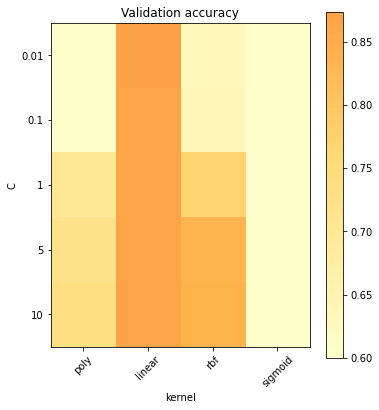

In [19]:
# Heat map
scores = clf_svm_grid.cv_results_["mean_test_score"].reshape(len(C_range), len(kernel_list))
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.YlOrRd,
    norm=MidpointNormalize(vmin=0.6, midpoint=0.92),
)
plt.xlabel("kernel")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(kernel_list)), kernel_list, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

### Decision Tree

In [20]:
# GridSearchCV for Decision Tree
max_depth=[1, 5, 10, 50]
min_samples_split=[5, 10, 100, 500]
parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split}

clf_dec_ = DecisionTreeClassifier(random_state=0)
clf_dec_grid = GridSearchCV(clf_dec_, parameters)
clf_dec_grid.fit(train_text_vector,train_sentiment)

print(f'best parameter: {clf_dec_grid.best_params_}')

best parameter: {'max_depth': 50, 'min_samples_split': 5}


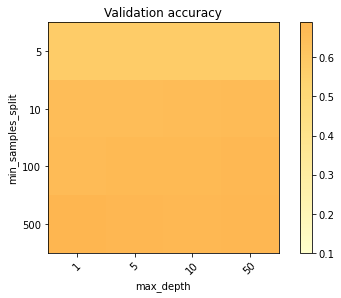

In [21]:
#heat map: max_depth vs min_samples_split
scores = clf_dec_grid.cv_results_["mean_test_score"].reshape(len(max_depth), len(min_samples_split))
plt.figure(figsize=(8, 4))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95) #left=0.2, right=0.95, bottom=0.15, top=0.95
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.YlOrRd,
    norm=MidpointNormalize(vmin=0.1, midpoint=0.92),
)
plt.xlabel("max_depth")
plt.ylabel("min_samples_split")
plt.colorbar()
plt.xticks(np.arange(len(max_depth)), max_depth, rotation=45)
plt.yticks(np.arange(len(min_samples_split)), min_samples_split)
plt.title("Validation accuracy")
plt.show()

### Logistic Regression

In [22]:
# GridSearchCV for Logistic regression
penalty_list = ['l2', 'l1']
solver_list = ['lbfgs', 'newton-cg', 'sag']
C_range = [0.01, 0.1, 1, 5, 10]
parameters = {'C':C_range, 'solver' : solver_list}

clf_log = LogisticRegression()
clf_log_grid = GridSearchCV(clf_log, parameters)
clf_log_grid.fit(train_text_vector,train_sentiment)

print(f'best parameter: {clf_log_grid.best_params_}')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best parameter: {'C': 0.1, 'solver': 'lbfgs'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


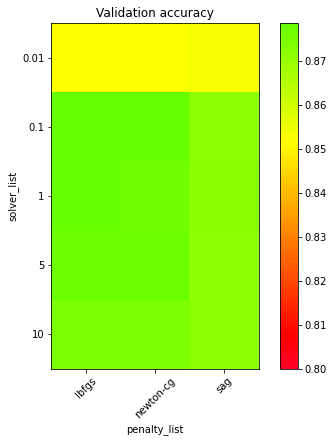

In [23]:
#heat map: penalty_list vs solver_list
scores = clf_log_grid.cv_results_["mean_test_score"].reshape(len(C_range), len(solver_list))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.gist_rainbow,
    norm=MidpointNormalize(vmin=0.8, midpoint=0.92)
)
plt.xlabel("penalty_list")
plt.ylabel("solver_list")
plt.colorbar()
plt.xticks(np.arange(len(solver_list)), solver_list, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

## 4-2: Stop word

To save storage space and improve search efficiency, certain words are automatically filtered out before or after natural language processing data, and these words or words are called Stop Words.
For some search engines, these are some of the most common, short function words, such as the, is, at, which, and on.

In [24]:
import re
import nltk

def clean_text(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    text = [ lemma.lemmatize(word) for word in text] 
    text =" ".join(text)
    return text

clean_vectorizer = CountVectorizer(stop_words="english")
clean_train_x = [clean_text(text) for text in train_text]
clean_test_x = [clean_text(text) for text in test_text]

#filter stop words
clean_vectorizer = CountVectorizer(stop_words="english")
clean_train_x_vec = clean_vectorizer.fit_transform(clean_train_x)
clean_test_x_vec = clean_vectorizer.transform(clean_test_x)

## 4-3: Re-build models

### SVM

In [25]:
# Optimization model's parameter
clf_svm_opt = svm.SVC(kernel='linear', C = 10)
clf_svm_opt.fit(train_text_vector,train_sentiment)

# Using stop word data set
clf_svm_cln = svm.SVC(kernel='linear', C = 10)
clf_svm_cln.fit(clean_train_x_vec,train_sentiment)

SVC(C=10, kernel='linear')

### Logistic Regression

In [26]:
# Optimization model's parameters
clf_log_opt = LogisticRegression(solver = 'lbfgs', C = 5)
clf_log_opt.fit(train_text_vector,train_sentiment)

# Using bad of word data set
clf_log_cln = LogisticRegression(solver = 'lbfgs', C = 5)
clf_log_cln.fit(clean_train_x_vec,train_sentiment)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=5)

### Decision Tree

In [28]:
# Optimization model's parameters
clf_dec_opt = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
clf_dec_opt.fit(train_text_vector,train_sentiment)

# Using bad of word data set
clf_dec_cln = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
clf_dec_cln.fit(clean_train_x_vec,train_sentiment)

DecisionTreeClassifier(max_depth=50, min_samples_split=500)

## 4-4: F1 score

In [29]:
f1_svm_opt = f1_score(test_sentiment, clf_svm_opt.predict(test_text_vector), average=None, labels = ['Positive', 'Negative'])
f1_svm_cln = f1_score(test_sentiment, clf_svm_cln.predict(clean_test_x_vec), average=None, labels = ['Positive', 'Negative'])
print('SVM_opt positive: \n{:.4}%, negative: {:.4}%, average: {:.4}%'.format(f1_svm_opt[0]*100, f1_svm_opt[1]*100, (f1_svm_opt[0] + f1_svm_opt[1])/2*100))
print('SVM_cln positive: \n{:.4}%, negative: {:.4}%, average: {:.4}%'.format(f1_svm_cln[0]*100, f1_svm_cln[1]*100, (f1_svm_cln[0] + f1_svm_cln[1])/2*100))

SVM_opt positive: 
80.84%, negative: 82.58%, average: 81.71%
SVM_cln positive: 
77.99%, negative: 80.19%, average: 79.09%


In [30]:
f1_dec_opt = f1_score(test_sentiment, clf_dec_opt.predict(test_text_vector), average=None, labels = ['Positive', 'Negative'])
f1_dec_cln = f1_score(test_sentiment, clf_dec_cln.predict(clean_test_x_vec), average=None, labels = ['Positive', 'Negative'])
print('SVM_opt positive: \n{:.4}%, negative: {:.4}%, average: {:.4}%'.format(f1_dec_opt[0]*100, f1_dec_opt[1]*100, (f1_dec_opt[0] + f1_dec_opt[1])/2*100))
print('SVM_cln positive: \n{:.4}%, negative: {:.4}%, average: {:.4}%'.format(f1_dec_cln[0]*100, f1_dec_cln[1]*100, (f1_dec_cln[0] + f1_dec_cln[1])/2*100))

SVM_opt positive: 
66.42%, negative: 70.6%, average: 68.51%
SVM_cln positive: 
66.18%, negative: 72.88%, average: 69.53%


In [31]:
f1_log_opt = f1_score(test_sentiment, clf_log_opt.predict(test_text_vector), average=None, labels = ['Positive', 'Negative'])
f1_log_cln = f1_score(test_sentiment, clf_log_cln.predict(clean_test_x_vec), average=None, labels = ['Positive', 'Negative'])
print('Logistic regreesion opt positive: \n{:.4}, negative: {:.4}, average: {:.4}'.format(f1_log_opt[0]*100, f1_log_opt[1]*100, (f1_log_opt[0] + f1_log_opt[1])/2*100))
print('Logistic regreesion cln positive: \n{:.4}, negative: {:.4}, average: {:.4}'.format(f1_log_cln[0]*100, f1_log_cln[1]*100, (f1_log_cln[0] + f1_log_cln[1])/2*100))

Logistic regreesion opt positive: 
81.54, negative: 83.28, average: 82.41
Logistic regreesion cln positive: 
80.11, negative: 82.0, average: 81.05


# Comclusion

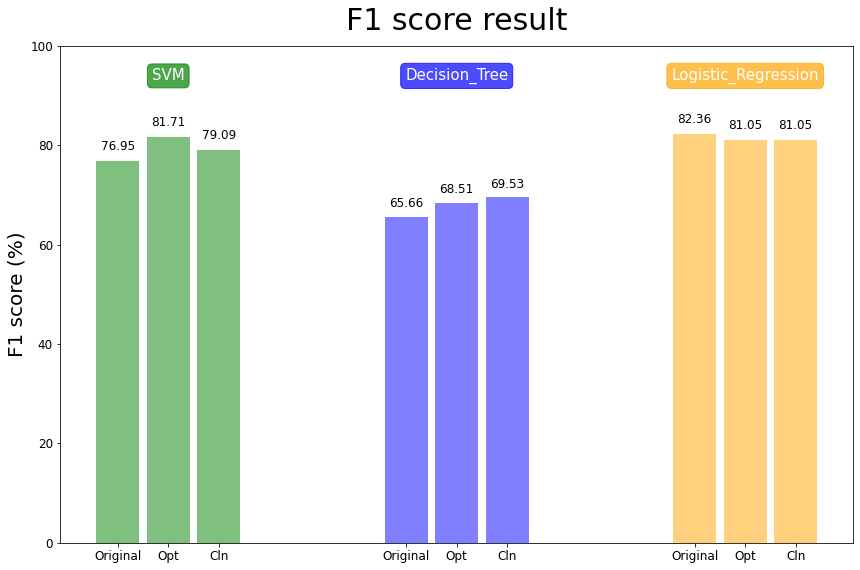

In [32]:
import matplotlib.pyplot as plt
# f1_dec_opt = [0.666, 0.666]
# f1_dec_cln = [0.555, 0.555]

labels = ['SVM', 'Decision_Tree', 'Logistic_Regression']
Original = [f1_svm, f1_dec, f1_log]
Opt = [f1_svm_opt, f1_dec_opt, f1_log_cln]
Cln = [f1_svm_cln, f1_dec_cln, f1_log_cln]

SVM = [f1_svm, f1_svm_opt, f1_svm_cln]
DecisionTree = [f1_dec, f1_dec_opt, f1_dec_cln]
LogisticRegression = [f1_log, f1_log_opt, f1_log_cln]

# Plot
width = 0.35
x = np.arange(len(labels))
color =  ['green',  'blue',  'orange',  'red']

fig, ax = plt.subplots(figsize = (12,8))

bar1 = ax.bar(x - width/2, [(f1[0]+f1[1])/2*100 for f1 in Original], width = 0.15, color = color, alpha=0.5)
bar2 = ax.bar(x, [(f1[0]+f1[1])/2*100 for f1 in Opt], width = 0.15, color = color, alpha=0.5)
bar3 = ax.bar(x + width/2, [(f1[0]+f1[1])/2*100 for f1 in Cln], width = 0.15, color = color, alpha=0.5)

multi_labels = ['Original', 'Opt', 'Cln'] * 3
group = []
for i in x:
    group.append(x[i]-width/2)
    group.append(x[i])
    group.append(x[i]+width/2)
    
ax.set_ylabel('F1 score (%)', fontsize = 20)
ax.set_title('F1 score result', fontdict = {'fontsize':30}, y = 1.02)
ax.set_ylim([0, 100])
ax.set_xticks(group)
ax.set_xticklabels(multi_labels, fontsize = 12)

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.02, 
            '%.2f' % float(height),
            ha = "center",
            va = "bottom",
            fontsize = 12, fontweight = 'medium'
        )

createLabels(bar1)
createLabels(bar2)
createLabels(bar3)

span_range = [[group[i] for i in range(3)], [group[i] for i in range(3,6)], [group[i] for i in range(6,9)]]

for index, sub_group in enumerate(labels):
    ax.annotate(sub_group
                ,xy = (index, 94)
                ,xytext = (0,0), textcoords='offset points'
                ,va="center", ha="center"
                ,color="w", fontsize=15, fontweight='medium'
                ,bbox=dict(boxstyle='round', pad=0.3, color=color[index], alpha=0.7))

fig.tight_layout()
plt.yticks(fontsize=12)
plt.show()

From this result, we can find that Logistic Regression has higher F1 score (~82%) compared to SVM and decision tree.